In [38]:
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pandas as pd
import sqlite3
import numpy as np
from numpy import random
from functools import reduce

In [ ]:
#Is there a statistical difference in the average players rating per match between different leagues?
#Is there a statistical difference in the highest average players rating league to other leagues
#Is there a statistical difference in the avg players potential per league?


In [85]:
def Cohen_d(group1, group2):

    # Compute Cohen's d.

    # group1: Series or NumPy array
    # group2: Series or NumPy array

    # returns a floating point number 

    diff = group1.mean() - group2.mean()

    n1, n2 = len(group1), len(group2)
    var1 = group1.var()
    var2 = group2.var()

    # Calculate the pooled threshold as shown earlier
    pooled_var = (n1 * var1 + n2 * var2) / (n1 + n2)
    
    # Calculate Cohen's d statistic
    d = diff / np.sqrt(pooled_var)
    
    return d

# Avgerage rating of players in league

In [12]:
rating_df = pd.read_csv('avg_player_rating.csv')
potential_df = pd.read_csv('avg_player_potential.csv')

In [13]:
ned_league_rating = rating_df.loc[rating_df['league']== 'Netherlands Eredivisie']
port_league_rating = rating_df.loc[rating_df['league']== 'Portugal Liga ZON Sagres']

In [ ]:
other_league_rating = rating_df.loc[rating_df['league']!= 'Netherlands Eredivisie']

In [15]:
ned_league_rating_df = ned_league_rating['avg_player_rating']
port_league_rating_df = port_league_rating['avg_player_rating']

Ttest_indResult(statistic=-0.46880757273489804, pvalue=0.6392380237116921)
effect size: 0.014930547115080054


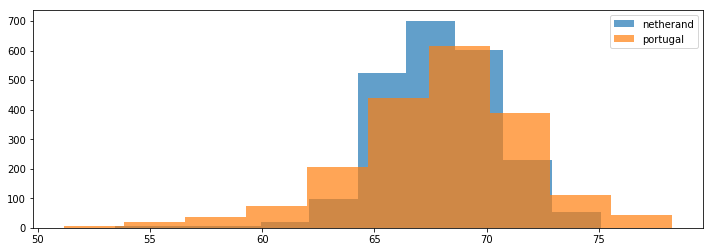

In [87]:
print(stats.ttest_ind(ned_league_rating_df, port_league_rating_df, equal_var=False))
print(F"effect size:",Cohen_d(port_league_rating_df, ned_league_rating_df))
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(12, 4))
plt.hist(ned_league_rating_df, alpha=.7, label='netherand')
plt.hist(port_league_rating_df, alpha=.7, label='portugal')
ax.legend(['netherand', 'portugal'])
plt.show()

In [96]:
# There is no statistical significant difference between Average rating of players in the 
# Netherand league and Portugal league. 
# Failed to reject null hypothesis because the p-value is higher than .05


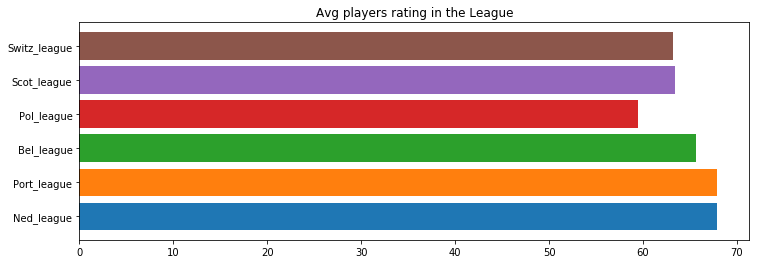

In [117]:
fig, ax = plt.subplots(figsize=(12, 4))
plt.barh("Ned_league" , ned_league_rating_df.mean(), label='netherand')
plt.barh("Port_league", port_league_rating_df.mean(), label='portugal')
plt.barh("Bel_league" , bel_league_rating_df.mean(), label='belgium')
plt.barh("Pol_league" , pol_league_rating_df.mean(), label='poland')
plt.barh("Scot_league" , scot_league_rating_df.mean(), label='scotland')
plt.barh("Switz_league" , switz_league_rating_df.mean(), label='swtizland')
ax.set_title("Avg players rating in the League")
# ax.legend(['netherand', 'portugal'])
plt.show()
# df.set_index('wins').plot(kind='barh', ax=axes[0])
# axes[0].set_title('wins')

# df.set_index('losses').plot(kind='barh', ax=axes[1])
# axes[1].set_title('losses')



In [111]:
print(ned_league_rating_df.mean())
print(port_league_rating_df.mean())

67.85464608911256
67.90376154359285


In [31]:
rating_df.league.unique()

array(['Belgium Jupiler League', 'Netherlands Eredivisie',
       'Poland Ekstraklasa', 'Portugal Liga ZON Sagres',
       'Scotland Premier League', 'Switzerland Super League'],
      dtype=object)

In [47]:
bel_league_rating = rating_df.loc[rating_df['league']== 'Belgium Jupiler League']
pol_league_rating = rating_df.loc[rating_df['league']== 'Poland Ekstraklasa']
scot_league_rating = rating_df.loc[rating_df['league']== 'Scotland Premier League']
switz_league_rating = rating_df.loc[rating_df['league']== 'Switzerland Super League']

In [48]:
bel_league_rating_df = bel_league_rating['avg_player_rating']
pol_league_rating_df  = pol_league_rating['avg_player_rating']
scot_league_rating_df = scot_league_rating['avg_player_rating']
switz_league_rating_df = switz_league_rating['avg_player_rating']

In [123]:
print("NED vs PORT")
print(stats.ttest_ind(ned_league_rating_df, port_league_rating_df, equal_var=False))
print("NED vs BEL")
print(stats.ttest_ind(ned_league_rating_df, bel_league_rating_df, equal_var=False))
# print(F"effect size:",Cohen_d(ned_league_rating_df, bel_league_rating_df))
print("NED vs POL")
print(stats.ttest_ind(ned_league_rating_df, pol_league_rating_df, equal_var=False))
# print(F"effect size:",Cohen_d(ned_league_rating_df, pol_league_rating_df))
print("NED vs Scot")
print(stats.ttest_ind(ned_league_rating_df, scot_league_rating_df, equal_var=False))
# print(F"effect size:",Cohen_d(ned_league_rating_df, scot_league_rating_df))
print("NED vs Switz")
print(stats.ttest_ind(ned_league_rating_df, switz_league_rating_df, equal_var=False))
# print(F"effect size:",Cohen_d(ned_league_rating_df, switz_league_rating_df))

NED vs PORT
Ttest_indResult(statistic=-0.46880757273489804, pvalue=0.6392380237116921)
NED vs BEL
Ttest_indResult(statistic=22.654643209170786, pvalue=7.44240341320733e-105)
NED vs POL
Ttest_indResult(statistic=61.94693715340812, pvalue=0.0)
NED vs Scot
Ttest_indResult(statistic=51.42317347956111, pvalue=0.0)
NED vs Switz
Ttest_indResult(statistic=50.719717374347844, pvalue=0.0)


In [ ]:
#An independent-samples t-test was used to check the difference of highest avg players rating in league to other leagues
# t(2243) = 45.35, p=.0, 

In [100]:
print(f"AVG players rating in Ned_league:",ned_league_rating_df.mean())
print(f"AVG players rating in Port_league:",port_league_rating_df.mean())
print(f"AVG players rating in Bel_league:",bel_league_rating_df.mean())
print(f"AVG players rating in Pol_league:",pol_league_rating_df.mean())
print(f"AVG players rating in Scot_league:",scot_league_rating_df.mean())
print(f"AVG players rating in Switz_league:",switz_league_rating_df.mean())

AVG players rating in Ned_league: 67.85464608911256
AVG players rating in Port_league: 67.90376154359285
AVG players rating in Bel_league: 65.69183660616169
AVG players rating in Pol_league: 59.51608087443279
AVG players rating in Scot_league: 63.43803624053617
AVG players rating in Switz_league: 63.2336793083073


# Players avgerage potential in each league

In [25]:
ned_league_potential = potential_df.loc[potential_df['league']== 'Netherlands Eredivisie']
port_league_potential = potential_df.loc[potential_df['league']== 'Portugal Liga ZON Sagres']

In [26]:
ned_league_potential_df = ned_league_potential['avg_players_potential']
port_league_potential_df = port_league_potential['avg_players_potential']

Ttest_indResult(statistic=6.375249240847763, pvalue=2.0732734438538002e-10)


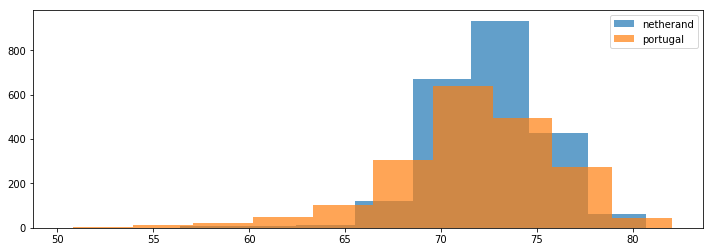

In [27]:
print(stats.ttest_ind(ned_league_potential_df, port_league_potential_df, equal_var=False))

fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(12, 4))
plt.hist(ned_league_potential_df, alpha=.7, label='netherand')
plt.hist(port_league_potential_df, alpha=.7, label='portugal')
ax.legend(['netherand', 'portugal'])
plt.show()

In [78]:
# finding Effect size between Ned and Port
Cohen_d(ned_league_potential_df, port_league_potential_df)
# small effect

0.20254420486238936

In [ ]:
# we are 95% sure that the players average potential in Netherand league is 
# higher than the players in portugal league 
# we reject the null hypothesis because the p-value is less than 0.05

In [74]:
t,p = stats.ttest_ind(ned_league_potential_df, port_league_potential_df, equal_var=False)
p/2

1.0366367219269001e-10

In [61]:
bel_league_P_potential = potential_df.loc[potential_df['league']== 'Belgium Jupiler League']
pol_league_P_potential = potential_df.loc[potential_df['league']== 'Poland Ekstraklasa']
scot_league_P_potential = potential_df.loc[potential_df['league']== 'Scotland Premier League']
switz_league_P_potential = potential_df.loc[potential_df['league']== 'Switzerland Super League']

In [63]:
bel_league_P_potential_df = bel_league_P_potential['avg_players_potential']
pol_league_P_potential_df  = pol_league_P_potential['avg_players_potential']
scot_league_P_potential_df = scot_league_P_potential['avg_players_potential']
switz_league_P_potential_df = switz_league_P_potential['avg_players_potential']

In [80]:
print("NED vs BEL")
print(stats.ttest_ind(ned_league_potential_df, bel_league_P_potential_df, equal_var=False))
print(f"effect size: {Cohen_d(ned_league_potential_df, bel_league_P_potential_df)}")
print("NED vs POL")
print(stats.ttest_ind(ned_league_potential_df, pol_league_P_potential_df, equal_var=False))
print(f"effect size: {Cohen_d(ned_league_potential_df, pol_league_P_potential_df)}")
print("NED vs Scot")
print(stats.ttest_ind(ned_league_potential_df, scot_league_P_potential_df, equal_var=False))
print(f"effect size: {Cohen_d(ned_league_potential_df, scot_league_P_potential_df)}")
print("NED vs Switz")
print(stats.ttest_ind(ned_league_potential_df, switz_league_P_potential_df, equal_var=False))
print(f"effect size: {Cohen_d(ned_league_potential_df, switz_league_P_potential_df)}")

NED vs BEL
Ttest_indResult(statistic=28.24840284186084, pvalue=4.4335620380137e-155)
effect size: 0.970966565478423
NED vs POL
Ttest_indResult(statistic=60.031883730786305, pvalue=0.0)
effect size: 2.7579779094016406
NED vs Scot
Ttest_indResult(statistic=52.800734203136734, pvalue=0.0)
effect size: 1.647023730961226
NED vs Switz
Ttest_indResult(statistic=40.6784228188515, pvalue=1.0660381590878225e-287)
effect size: 1.379983206207138


In [118]:
rating_df['league'].unique()

array(['Belgium Jupiler League', 'Netherlands Eredivisie',
       'Poland Ekstraklasa', 'Portugal Liga ZON Sagres',
       'Scotland Premier League', 'Switzerland Super League'],
      dtype=object)

In [120]:
print(ned_league_potential_df.mean())
print(port_league_potential_df.mean())
print(bel_league_P_potential_df.mean())
print(pol_league_P_potential_df.mean())
print(scot_league_P_potential_df.mean())
print(switz_league_P_potential_df.mean())

72.45938103527938
71.73388100123572
69.38321738360528
62.362527424933155
67.8478014842775
68.54370554131137


In [121]:
print(ned_league_potential_df.shape)
print(port_league_potential_df.shape)
print(bel_league_P_potential_df.shape)
print(pol_league_P_potential_df.shape)
print(scot_league_P_potential_df.shape)
print(switz_league_P_potential_df.shape)

(2243,)
(1944,)
(1519,)
(994,)
(1824,)
(1318,)


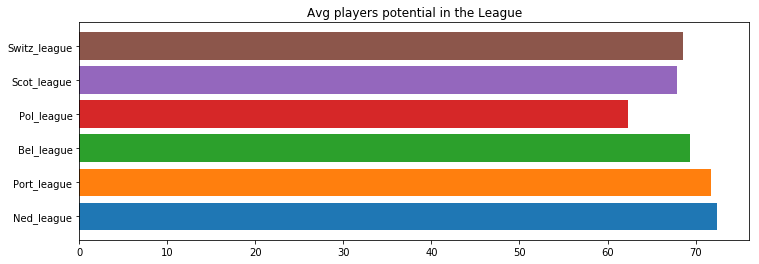

In [122]:
fig, ax = plt.subplots(figsize=(12, 4))
plt.barh("Ned_league" , ned_league_potential_df.mean(), label='netherand')
plt.barh("Port_league", port_league_potential_df.mean(), label='portugal')
plt.barh("Bel_league" , bel_league_P_potential_df.mean(), label='belgium')
plt.barh("Pol_league" , pol_league_P_potential_df.mean(), label='poland')
plt.barh("Scot_league" , scot_league_P_potential_df.mean(), label='scotland')
plt.barh("Switz_league" , switz_league_P_potential_df.mean(), label='swtizland')
ax.set_title("Avg players potential in the League")
# ax.legend(['netherand', 'portugal'])
plt.show()

In [140]:
print(stats.ttest_ind(ned_league_potential_df, potential_df.avg_players_potential, equal_var=False))

Ttest_indResult(statistic=-20.821646563239685, pvalue=4.2829153795218986e-91)


In [141]:
potential_df.avg_players_potential.mean()

73.9165238275123

In [142]:
ned_league_potential_df.mean()

72.45938103527938